# Understanding Linear Regression

Linear regression is the first and simplest kind of learning that you will encounter in computer vision.

In school you probably learned about the line equation, $y=mx+c$. You will remember that $m$ corresponds to a gradient, and $c$ is the point at which the line intercepts the y-axis.

You may also remember drawing a line of best fit. This is what your computer will be learning to draw, but in higher dimensions (more on that later). For now we work with two dimensions, but the intuitions behind two dimensions apply to three dimensions or greater.

In this Notebook, I work through a few examples of fitted lines on which our discussion of linear regression is based. After introducing these examples, they become the focus of our dicussion, where I work through the reasons for why we do things the way we do in as clear a manner as possible.

## Example 1: A line through data.

Let's start with a simple line: We will give it a gradient of 2 and a y-intercept of -1. What happens if we plot the integers from -5 to 5?

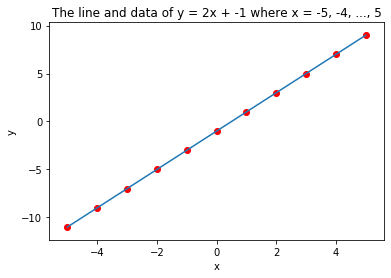

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# The gradient
m = 2

# The y-intercept
c = -1

# The line-equation
# This is a lambda function. It behaves as a normal function in the code.
line_eq = lambda x : m*x + c

# A list of numbers from -5 to 5.
x = np.arange(-5, 6)

# The points on the line.
# For every value in x, we multiply it by m and add c (as in the lambda function).
# Every value x-value has a corresponding y-value that sits on the line. 
y = line_eq(x)

# Then we plot x against y.
plt.title('The line and data of y = %dx + %d where x = -5, -4, ..., 5' % (m, c))
plt.plot(x, y) # Plotting a line through the points.
plt.scatter(x, y, c='r') # Plotting red circles at each point.
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The blue line through those points is the *best* line of best fit. We won't find anything better. It is especially good since all of the points lie on the line. For these reasons we call the line the **optimal model**, as the line predicts the y-values for the given x-values very well. Because we have the optimal line, we also know the **optimal parameters** for this model; the optimal model is when $m=2$ and $c=-1$.

## Example 2: A line through noisy data.

Most of the data that you will encounter in machine learning will not look like this. Data is messy because life is messy. There is rarely such a clear relationship between two variables.

Most of the time there is **noise** in the data. What happens when we add noise?

We shall see in the code below. Here we are going to add noise to the y-values above. Now every 

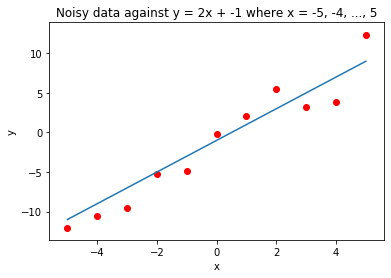

In [93]:
# Make our noise, by creating a vector of random values. This must be the same size as y above.
# y should is a 11-unit-long vector, corresponding to the 11 x-values.
# We pass np.random.rand a single number. This is the number of units of the array y.
# I subtract the random numbers by 0.5 to change the range from [0, 1] to [-0.5, 0.5].
# Then I multiply the values by a constant a to change the range to [-0.5a, 0.5a]
a = 8
noise = (np.random.rand(y.size) - 0.5) * a

# Add the noise to y
y_noisy = y + noise

# Now plot the noise against the line.
# You don't need to put this in a function;
# I just want to use it later.
def good_fit():
    plt.title('Noisy data against y = %dx + %d where x = -5, -4, ..., 5' % (m, c))
    plt.plot(x, y) # Plotting a line through the points.
    plt.scatter(x, y_noisy, c='r') # Plotting red circles at each point.
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
good_fit()

You will see that the points lie above and below the line. This is because the noise shifted the points up and down from the line using that noise. This noise makes it difficult to find a line of best fit in the data. Of course, we know the line, because we defined it. What if we don't know the line?

## Example 3: Data without a line<a id="example3"></a>

### Where to begin?

Pretend that we do not know $m$ and $c$. Instead, we are trying to find those values. Where do we start?

Well, we need a starting point; anywhere is fine, even if it is random.

In [3]:
random_m = np.random.rand()
random_c = np.random.rand()

Great, so we have two numbers. It is incredibly unlikely that we have the right values straight away; not impossible, but very unlikely.

Let's see how wrong these values are against the noisy y-values we made in Example 2.

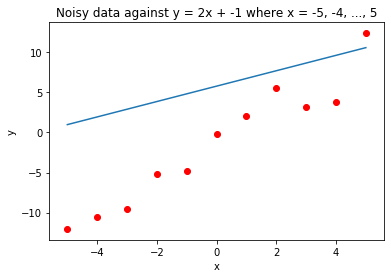

In [94]:
model = lambda m_, c_ : m_ * x + c_

bad_y_values = model(random_m, random_c)

# Now plot the noise against the line.
# You don't need to put this in a function;
# I just want to use it later.
def bad_fit():
    plt.title('Noisy data against y = %dx + %d where x = -5, -4, ..., 5' % (m, c))
    plt.plot(x, bad_y_values) # Plotting a line through the points.
    plt.scatter(x, y_noisy, c='r') # Plotting red circles at each point.
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
bad_fit()

You are looking at a *bad* model; it's a line of bad fit.

But *how bad is this line?* In other words, how can we measure the badness of the line?

Indeed, any better fit is a line that is on average closer to the data.

So now we need two things:

1. A way to measure how bad the line is.
2. A way to change the line to improve it.

This is where calculus comes in.

### How Do We Know whether We Have the Right Parameters?

This is a fairly long explanation compared to the previous work. But stick with it. I have made the explanation as clear as possible.

#### Measuring the Badness of the Fit

As we remarked above, any line is better if it is closer to the data. We can think of this as reducing the distance between the line and the points. Before we begin, we should clarify the concepts behind *prediction* and *approximation*.

Since we know what $x$ and $y$ are, our objective is to find the best $m$ and $c$ that relate the two. We call $m$ and $c$ our *parameters*. We can write the relationship between the parameters and the data $x$ and $y$ as $y=mx+c$.

**An important aside:** Note that we have hitherto considered $x$ and $y$ as arrays. The two arrays are the same size, and the elements correspond. That is, $x_0 \rightarrow y_0, x_1 \rightarrow y_1$, etc. For individual and specific values, we will index into these arrays, where $x_i$ is the $i$th element of $x$, and likewise for $y$. If we are referring to $x$ or $y$ values generally, we will not use these subscripts, just $x$ or $y$.

Our *approximations* of $m$ and $c$ are written with a different notation, to make this clear. We will write them with a hat (^). (Others will differ on the particular notation.) We will write $\hat{m}$ for our approximation of $m$, and $\hat{c}$ for our approximation of $c$.

With these approximations, we make a *prediction*. If our input is $x$, our output is $y$. We use the approximations $\hat{m}$ and $\hat{c}$ to predict $y$; we write this prediction as $\hat{y} = \hat{m}x+\hat{c}$. This means that if we have a bad model, $\hat{y}$ is not going to be the same as $y$.

In our original example, the true values are $m=2$ and $c=-1$. Our approximations $\hat{m}$ and $\hat{c}$ therefore need to be as close to the true values as possible. *Indeed, we will know if our model works if it is close to these values.*

To measure the distance between the points, we need only measure the difference between the prediction $\hat{y}$ and the true value $y$.  This is simply $$y - \hat{y} = y - (\hat{m}x+\hat{c}).$$ We calculate this over all $N$ samples of $x$ (in our case $N=11$): $$\sum^{N-1}_{i=0} y_i - \hat{y_i} = \sum^{N-1}_{i=0} y_i - (\hat{m}x_i+\hat{c}).$$

This is still not enough, though. The prediction $\hat{y}$ may be higher or lower than the true $y$. Suppose our fitted line is very bad, but the number of positive distances ($y_i - \hat{y_i} \ge 0$) is equal to the number of negative distances ($y_i - \hat{y_i} < 0$). The result of the sum will be zero. We know our model is bad, but the sum is 0. Something is wrong here.

There are two ways to fix this problem: <a id="losschoice"></a>

1. Make the negative distances positive by taking the mod of the inner subtraction. That is, $$\sum^{N-1}_{i=0} |y_i - \hat{y_i}|.$$
2. Take the square of the subtraction. That is, $$\sum^{N-1}_{i=0} [y_i - \hat{y_i}]^2.$$

Both of these will work, but we will choose the second way&mdash;for a very, very good reason, which is [explained further down](#parabolae).

Anyway&mdash;congratulations! If you followed this through, you have found how we obtained the **residual sum of squares** (RSS), i.e. the sum of the squares of the distances. For simplicity, we use $E$ to denote this measure. $E$ takes the two paramters $\hat{m}$ and $\hat{c}$ as arguments. $$E(\hat{m}, \hat{c}) = \sum^{N-1}_{i=0} [y_i - \hat{y_i}]^2 = \sum^{N-1}_{i=0} [y_i - (\hat{m}x_i+\hat{c})]^2.$$

**N.B.:** There are other such measures, such as the mean of squared errors, which lead to different differentiations later on. If the later sections do not correspond fully with your own code, consider this might be a source of the difference.

In [5]:
# Here is how that residual some of squares will look
residual_sum_of_squares = lambda y, y_hat : np.sum(np.power(y - y_hat, 2))

print('The RSS of the bad y-values:', residual_sum_of_squares(y_noisy, bad_y_values))

The RSS of the bad y-values: 662.8860901073976


As this value corresponds to the distance of the line from the points (and hence its badness), we would like this ideally to be zero. Failing that, we would prefer something small.

Because the data $x$ and $y$ is fixed (as in any machine-learning problem), we can only change the parameters $\hat{m}$ and $\hat{c}$. The size of the RSS informs us by how much we should change the parameters.

#### Learning the Parameters

Now that we have the our badness-measure, the residual sum of squares (RSS), we know how bad the prediction is&mdash;but hidden in the algebraic expression is a way to know how to change the parameters. We know the parameters could be better. But do we increase or decrease their value? Which direction will produce an improvement? By how much should we change the parameters?

We could change the parameters bit by bit, very slowly; but this is *incredibly* tedious. If we use the data we have, and the current incorrectness, we can make better-informed moves and know at the same time that we are moving in the right direction.

The solution is *partial differentiation.*

After partially differentiating the RSS with respect to our parameters $\hat{m}$ and $\hat{c}$ gives us&mdash;$$\frac{\partial{E}}{\partial\hat{m}}=2\sum^{N-1}_{i=0} x_i(\hat{y_i}-y_i) \quad \text{and} \quad \frac{\partial{E}}{\partial\hat{c}}=2\sum^{N-1}_{i=0}\hat{y_i}-y_i.$$

**N.B.:** These are _also_ referred to as gradients. So now we have two kinds of gradients: There is the gradient in the line equation $m$, and the gradient of the RSS.

In [10]:
# Here we create functions to compute the gradient of RSS with respect
# to random_m and random_c.
partial_deriv_wrt_m = lambda x, y, y_hat : 2 * np.sum(np.dot(x, (y_hat - y)))
partial_deriv_wrt_c = lambda y, y_hat : 2 * np.sum(y_hat - y)

# Finally we calculate those gradients.
gradient_wrt_m = partial_deriv_wrt_m(x, y, bad_y_values)
gradient_wrt_c = partial_deriv_wrt_c(y, bad_y_values)

print('The badness of the fit according to RSS:', residual_sum_of_squares(y_noisy, bad_y_values))
print('Gradient of RSS with respect to m:', gradient_wrt_m)
print('Gradient of RSS with respect to c:', gradient_wrt_c)

The badness of the fit according to RSS: 662.8860901073976
Gradient of RSS with respect to m: -228.72038006806443
Gradient of RSS with respect to c: 149.26572880825455


We want those RSS gradients to be zero; when those gradients are zero, we have reached an **optimum**.

#### Learning Curves and Parabolae<a id="parabolae"></a>

It is easier to think of what an optimum is when we consider the RSS over a range of values of $\hat{m}$. These values form a curve, or a *parabola*. Incidentally, this is the reason why [we choose the square of the subtraction](#losschoice). All quadratic equations have this shape. Many loss functions in machine learning are chosen for this reason. $$\text{Quadratic:}\quad y = x^2 \quad y=x^2+z^2 \quad y=x^2+x+1$$ $$\text{Not quadratic:}\quad y = x + 1 \text{ (linear)}\quad y = x^2 + z^3 \text{ (cubic)}$$

This curve is plotted below. I have also plotted a red point corresponding to the bad predictions we made above, and a green point where our optimum $m$ would lie.

**N.B.:** The y-intercept in this graph has been fixed at $\hat{c}$. This has an important consequence, as we will see below.

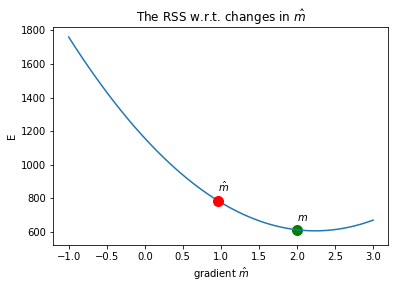

In [99]:
# Here we are creating a list of 100 values from -2 to 5.
possible_values_of_m = np.linspace(-1, 3, 100)

# Now we compute the RSS value for these values.
# We will have to create a new function with m included,
# which means we must substitute (m * x + c) for y_hat.
# Remember, we are fixing the y-intercept at random_c.
# We will pass this function an array of m's, so we must 
# therefore iterate through the values.
rss_expanded = lambda x, y, m_arr, c : np.array([np.sum(np.power(y - (m * x + c), 2)) for m in m_arr])
rss_curve_for_m = rss_expanded(x, y_noisy, possible_values_of_m, random_c)

# Plotting the curve
plt.plot(possible_values_of_m, rss_curve_for_m)

# Add a red point at for RSS with random_m and random_c.
plt.scatter(random_m, residual_sum_of_squares(y_noisy, bad_y_values), marker='o', c='r', s=100, zorder=10)
plt.annotate('$\hat{m}$', (random_m, residual_sum_of_squares(y_noisy, bad_y_values) + 50))

# Add a red point at for RSS with m (the optimum) and random_c.
plt.scatter(m, rss_expanded(x, y_noisy, [m], random_c), marker='o', c='g', s=100)
plt.annotate('$m$', (m, rss_expanded(x, y_noisy, [m], random_c) + 50), )

plt.title('The RSS w.r.t. changes in $\hat{m}$')
plt.xlabel('gradient $\hat{m}$')
plt.ylabel('E')

plt.show()

The object of linear regression is to change our $\hat{m}$, the red point, down the curve towards $m$, the green point. If you scroll up, you should notice that the sign of the gradient (-/+) corresponds to the position of the red point on the curve. A negative sign means the function is decreasing at $\hat{m}$; a positive sign means it is increasing. The green point lies at the **inflection point** of the curve&mdash;the point where the values stop decreasing and start increasing. In other words, it's the point where we can go no lower. This is why it's the optimum point.

Then what do we need to know when we are optimising $\hat{m}$?

If we want to move the RSS value at $\hat{m}$ closer to the optimum $m$, we will need to add a value to $\hat{m}$ if the gradient is negative, or subtract from it if the gradient is positive. Notice, too, that the size of the gradient is smaller as we approach the optimum point. The absolute value&mdash;the value when we ignore the sign (+/-)&mdash; gets smaller. As we move closer to the optimum point, we should make smaller and smaller changes of $\hat{m}$, because taking large steps will make it harder to reach a precise optimum.

This curve will not be the same throughout our optimisation, however. We have to remember that *we fixed the y-intercept at $\hat{c}$. When we change $\hat{c}$ during optimisation, this will change how this curve looks; i.e., the values of RSS.*

In conclusion, to optimise our linear regression, we need to optimise $\hat{m}$ and $\hat{c}$ *at the same time*, and get those gradients down to zero. 

### And Finally, We Learn

Taking what we have learned in previous sections, we can now finally do some learning. Firstly, let's recount some of the objects of our discussion.

In our linear-regression problem we started of with our bad line&mdash;

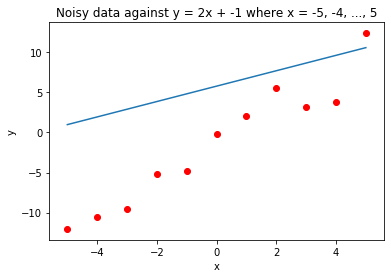

In [95]:
bad_fit()

and, through learning, we want to arrive at the best line, which we know is defined by $m$ and $c$:

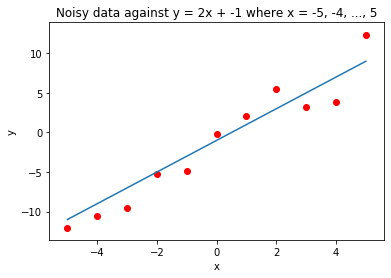

In [96]:
good_fit()

We will also recall that the gradients of RSS with respect to $\hat{m}$ and $\hat{c}$ were non-zero. We want them to be zero. These gradients tell us both the direction of change and the distance of the approximation from the optimum.

Let's make the first improvement to our model.

#### Ch&ndash; Ch&ndash; Ch&ndash; Ch&ndash; Changes: The First Step of Improvement

We use the gradient of RSS with respect to the parameters $\hat{m}$ and $\hat{c}$ to alter the parameters. However, we cannot use the raw gradients to change the values; they are too large. We will swing to the opposite side of the parabola, if we do not reach some very distant point. If we change $\hat{m}$ too dramatically, we risk larger and larger and gradients until the gradients&mdash;*explode*. If gradients explode, the values will become so large that the computer cannot store them, giving us NaN errors.

**Gradient explosion** is a risk we run here, and it is mitigated by selecting a small amount of the gradient, a selection controlled by the parameter $\alpha$. *We* select a value for $\alpha$. An appropriate alpha will avoid gradient explosions, while balancing it with the speed of learning new parameters. This selection depends entirely on the problem on the data, so do not assume that there is a universal, optimal $\alpha$.

The equation to calculate a new value for $\hat{m}$ and $\hat{c}$ looks like this: $$\hat{m}:=\hat{m}-\alpha\frac{\partial E}{\partial \hat{m}} \qquad\text{and}\qquad \hat{c}:=\hat{c}-\alpha\frac{\partial E}{\partial \hat{c}}.$$ That subtraction is important. It flips the sign of the second term, which corresponds to the (scaled) gradient. Remember that we want to change the value of our parameter in the opposite direction of the gradient in RSS. So if our gradient is negative, we want to change our parameter positively. The subtraction does just that.

The line's gradient changed from 0.96 to 1.19
The line's y-intercept changed from 5.78 to 5.64
Old RSS (786.04) and new RSS (704.08)


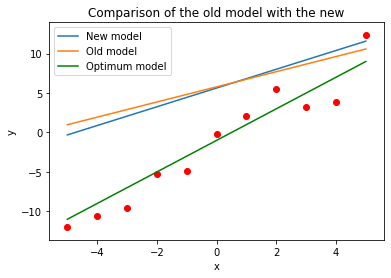

In [180]:
# We have already calculated the gradients above.
alpha = 0.001

# Here is where we improve the old values random_m
# and random_c. We are assigning these improved, new
# values to m_hat and c_hat. Remember that the subtraction
# is essential to flipping the sign of the gradient.
m_hat = random_m - alpha * gradient_wrt_m
c_hat = random_c - alpha * gradient_wrt_c

# Now we can recalculate the predictions...
y_prediction = x * m_hat + c_hat

print('The line\'s gradient changed from %.2f to %.2f' % (random_m, m_hat))
print('The line\'s y-intercept changed from %.2f to %.2f' % (random_c, c_hat))
print('Old RSS (%.2f) and new RSS (%.2f)' % (residual_sum_of_squares(y_noisy, bad_y_values), 
                                         residual_sum_of_squares(y_noisy, y_prediction)))

# ... and plot them.
plt.title('Comparison of the old model with the new')
plt.plot(x, y_prediction, label='New model')
plt.plot(x, bad_y_values, label='Old model')
plt.plot(x, y, c='g', label='Optimum model')
plt.scatter(x, y_noisy, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

By looking at the RSS values, we can see that this single update has improved the prediction; the gradient has increased slightly from  Let's do this nine more times.

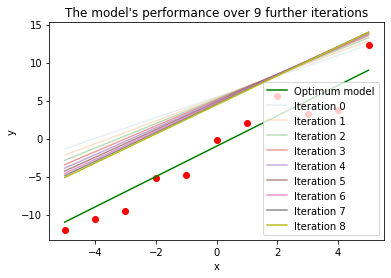

In [181]:
# Creating a figure to visualise the changes in the model
plt.title('The model\'s performance over 9 further iterations')
plt.scatter(x, y_noisy, c='r')
plt.plot(x, y, c='g', label='Optimum model')
plt.xlabel('x')
plt.ylabel('y')

iterations = 9
for i in range(iterations):
    # Replacing random_m and random_c with m_hat and c_hat
    # and recalculating the gradient.
    m_hat = m_hat - alpha * partial_deriv_wrt_m(x, y, y_prediction)
    c_hat = c_hat - alpha * partial_deriv_wrt_c(y, y_prediction)
    
    y_prediction = x * m_hat + c_hat
    
    plt.plot(x, y_prediction, label='Iteration %d' % i, alpha=(i+1)/iterations)

plt.legend()
plt.show()

The model has improved substantially&mdash;but it still isn't there. Let's update it a further 90 times.

The optimal m and c: 2.00, -1.00
Our model's m and c: 2.00, -1.00


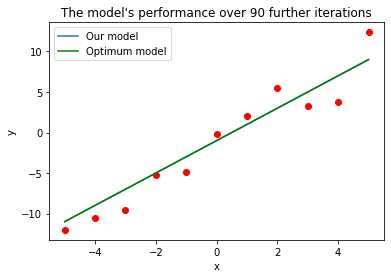

In [188]:
iterations = 90
for i in range(iterations):
    # Replacing random_m and random_c with m_hat and c_hat
    # and recalculating the gradient.
    m_hat = m_hat - alpha * partial_deriv_wrt_m(x, y, y_prediction)
    c_hat = c_hat - alpha * partial_deriv_wrt_c(y, y_prediction)
    
    y_prediction = x * m_hat + c_hat

print('The optimal m and c: %.2f, %.2f' % (m, c))
print('Our model\'s m and c: %.2f, %.2f' % (m_hat, c_hat))

plt.title('The model\'s performance over 90 further iterations')
plt.scatter(x, y_noisy, c='r')
plt.plot(x, y_prediction, label='Our model')
plt.plot(x, y, c='g', label='Optimum model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The model should be very close to the optimum now, if not indistinguishable. Running it a few more times should bring them into alignment if they are not already. If you would like to see that, re-run the above. 

#### Whoops, I Did It Again: Choosing the Wrong $\alpha$

I mentioned that choosing the wrong $\alpha$ leads to flipping or, worse, gradient explosions. Gradient explosions lead to runtime errors, so instead we will witness flipping.

Above I set the $\alpha$ to 0.001. What if we increase it by one order of magnitude to 0.1?

Firstly it trains quite quickly

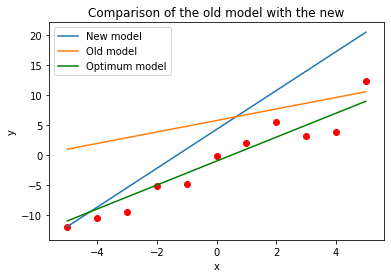

In [189]:
# The new alpha
alpha = 0.01

m_hat = random_m - alpha * gradient_wrt_m
c_hat = random_c - alpha * gradient_wrt_c

y_prediction = x * m_hat + c_hat

plt.title('Comparison of the old model with the new')
plt.plot(x, y_prediction, label='New model')
plt.plot(x, bad_y_values, label='Old model')
plt.plot(x, y, c='g', label='Optimum model')
plt.scatter(x, y_noisy, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

But&mdash;assuming the same thing happens on your end as on mine&mdash;the initial hope is quashed when you see what happens after a further 9 iterations.

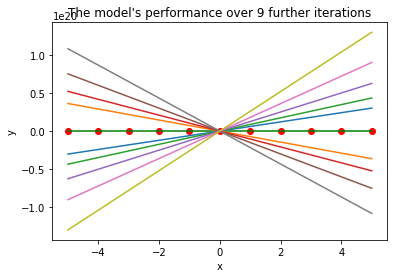

In [215]:
# Creating a figure to visualise the changes in the model
plt.title('The model\'s performance over 9 further iterations')
plt.scatter(x, y_noisy, c='r')
plt.plot(x, y, c='g', label='Optimum model')
plt.xlabel('x')
plt.ylabel('y')

iterations = 9
for i in range(iterations):
    m_hat = m_hat - alpha * partial_deriv_wrt_m(x, y, y_prediction)
    c_hat = c_hat - alpha * partial_deriv_wrt_c(y, y_prediction)
    
    y_prediction = x * m_hat + c_hat
    
    plt.plot(x, y_prediction)

plt.show()

You should be seeing a series of lines crossing at zero. If you keep re-running the previous cell, you will see that over time it does not improve.

This is what happens when you choose a bad $\alpha$. Perhaps this is worse than gradient explosions. At least gradient explosions cause program-errors.

## Working in Higher Dimensions

### Moving from Two- to Three-Dimensional Space

These intuitions work just as well in higher dimensions. Moving from two to three dimensions, you need only consider that line of best fit as a **plane** of best fit. A plane in three-dimensional space is an infinitely flat surface that expands in all directions. In mathematics, these objects are described as unbounded. In three-dimensional space, then, we are using this plane to predict the position of objects in space. Instead of a single input $x$, we consider an $x$ with two dimensions, values that are used in predicting a single-valued vector $y$.

You can imagine this as a natural, hilly landscape. The two x-values are the longitude and latitude, and the y-value is the height above sea-level. Perhaps we want to find the plane that separates hills from mountains. The peaks of any mountains should rise proudly above the plane, while the lowly hills cower below. A plane should correspond to that.

### Move from Three- to $n$-Dimensional Space

There is a joke about mathematicians and n-dimensional spaces. There are many on the Internet, and they're worth reading. From memory, I remember one that was on a website like _Stack Overflow_ where a student was asking how to visualise dimensions higher than three. A user replied helpfully, 'It's not so hard. Imagine an $\mathbf{R}^3$ space. Then replace the 3 with $n$.'

But this is actually how one ends up working out such high-dimensional spaces. Think of the rules that apply in three-dimensional space, then generalise it to a higher-dimensional space.

The lines of two-dimensional spaces become planes in three-dimensional spaces. Well, by a similar process, planes in three-dimensional spaces become hyperplanes in all dimensions higher than three. In four-dimensional space, a hyperplane is an infinitely thin cube occupying the entire fourth dimension.

These are dizzying concepts when they're first apprehended. But don't worry: you'll understand it.

Fortunately there are some four-dimensional spaces that will help you think about these things&mdash;*time and space*, for example. I am loathe to make any statements of fact about time and space, but these can be reasonably thought of as four-dimensional. Space is three-dimensional, and time is another dimension, and space changes across time.